In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Importing Libraries
import gzip

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pandas as pd


from os.path  import join

The exploration of handwritten digit recognition holds paramount importance in a myriad of applications, ranging from the digitization of historical documents to the automation of form processing in diverse industries. The accurate and efficient recognition of characters is a fundamental requirement in modern technological landscapes. At the heart of this study lies the MNIST dataset, a foundational benchmark containing 28x28 pixel grayscale images of handwritten digits spanning 0 through 9. Widely acknowledged as a cornerstone for the development and evaluation of Optical Character Recognition (OCR) systems, the MNIST dataset serves as the focal point of our investigation. To tackle this intricate task, we turn to Convolutional Neural Networks (CNNs), a potent class of deep learning models adept at handling image-related tasks, with the overarching goal of achieving precise and reliable digit classification.

Dataset Link: http://yann.lecun.com/exdb/mnist/

In [ ]:
image_size = 28

# Open and read training images
with gzip.open("/content/drive/MyDrive/AY/train-images-idx3-ubyte.gz", 'r') as train_images_byte:
    train_images_byte.read(16)
    buf = train_images_byte.read()
    train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    train_images = train_data.reshape(-1, image_size, image_size, 1)

# Open and read training labels
with gzip.open('/content/drive/MyDrive/AY/train-labels-idx1-ubyte.gz', 'r') as train_labels_byte:
    train_labels_byte.read(8)
    buf = train_labels_byte.read()
    labels = np.frombuffer(buf, dtype=np.uint8)

# Open and read test images
with gzip.open('/content/drive/MyDrive/AY/t10k-images-idx3-ubyte.gz', 'r') as test_images_byte:
    test_images_byte.read(16)
    buf = test_images_byte.read()
    test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    test_images = test_data.reshape(-1, image_size, image_size, 1)

# Open and read test labels
with gzip.open('/content/drive/MyDrive/AY/t10k-labels-idx1-ubyte.gz', 'r') as test_labels_byte:
    test_labels_byte.read(8)
    buf = test_labels_byte.read()
    test_labels = np.frombuffer(buf, dtype=np.uint8)

Extraction of images from the MNIST dataset, which is provided in the IDX format. This initial step set the foundation for subsequent processing and model training.

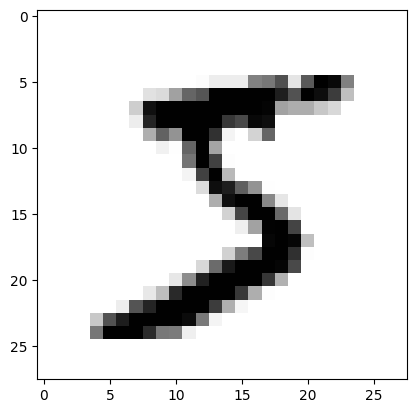

In [ ]:
#visualize the first test image
first_train_image = train_images[0, :, :, 0]

plt.imshow(first_train_image, cmap='binary')
plt.show()


In [ ]:
#Splitting and Normalizing the image pixel

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = train_images
X_test = test_images
y_train = labels
y_test = test_labels

Following image extraction, a critical data preprocessing phase ensued. This step involved normalizing the pixel values of the images, a crucial measure to enhance the convergence of the model during training. The normalization process aimed to bring the pixel values within a standardized range, facilitating more effective learning.

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

# **1. How did the use of different regularisation methods affect the performance of your CNN model?**


Training model with l2 regularization, dropout rate=0.0, batch normalization=False
Epoch 1/5
750/750 [==============================] - 71s 94ms/step - loss: 0.7898 - accuracy: 0.9096 - val_loss: 0.4219 - val_accuracy: 0.9612
Epoch 2/5
750/750 [==============================] - 66s 88ms/step - loss: 0.4054 - accuracy: 0.9550 - val_loss: 0.3797 - val_accuracy: 0.9578
Epoch 3/5
750/750 [==============================] - 66s 88ms/step - loss: 0.3585 - accuracy: 0.9596 - val_loss: 0.3432 - val_accuracy: 0.9626
Epoch 4/5
750/750 [==============================] - 68s 90ms/step - loss: 0.3361 - accuracy: 0.9617 - val_loss: 0.3304 - val_accuracy: 0.9589
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.3161 - accuracy: 0.9647
Test accuracy: 0.9646999835968018


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


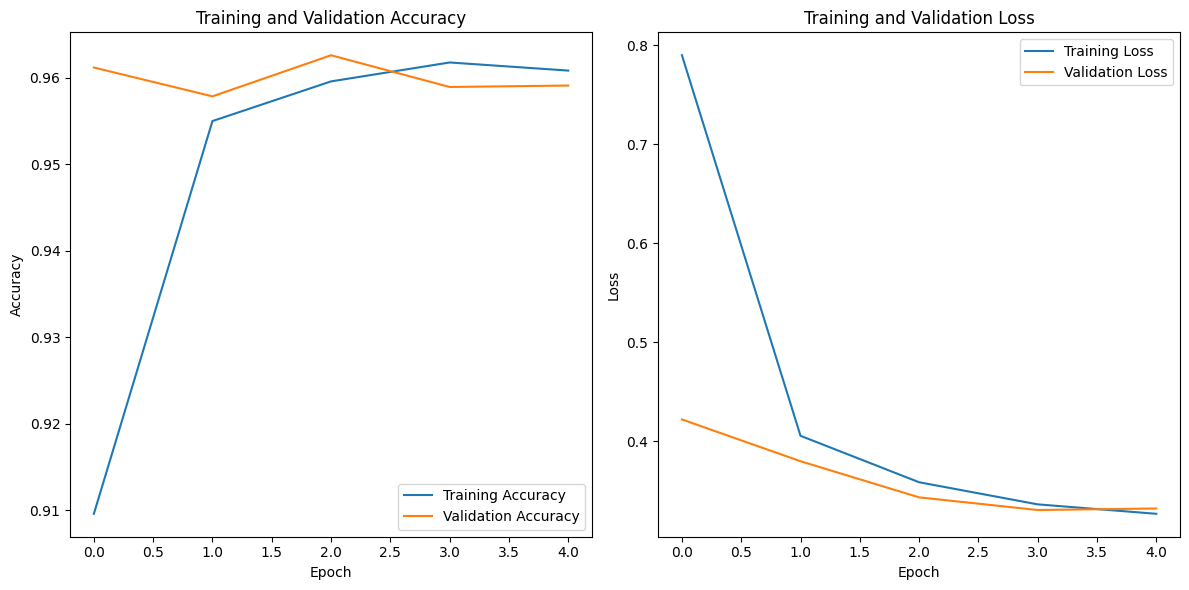


Training model with l2 regularization, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 92s 120ms/step - loss: 0.8008 - accuracy: 0.9647 - val_loss: 0.4118 - val_accuracy: 0.9084
Epoch 2/5
750/750 [==============================] - 90s 120ms/step - loss: 0.1959 - accuracy: 0.9770 - val_loss: 0.2261 - val_accuracy: 0.9682
Epoch 3/5
750/750 [==============================] - 89s 119ms/step - loss: 0.1836 - accuracy: 0.9796 - val_loss: 0.1953 - val_accuracy: 0.9771
Epoch 4/5
750/750 [==============================] - 91s 121ms/step - loss: 0.1767 - accuracy: 0.9811 - val_loss: 0.2082 - val_accuracy: 0.9664
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 0.1865 - accuracy: 0.9734
Test accuracy: 0.9733999967575073


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


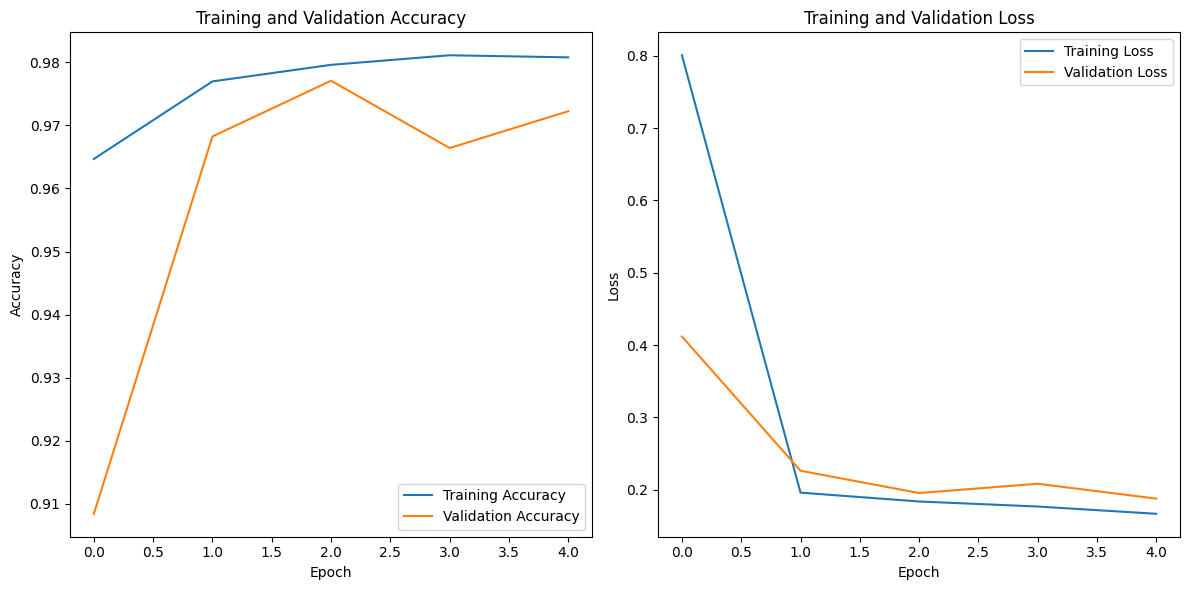


Training model with l2 regularization, dropout rate=0.3, batch normalization=False
Epoch 1/5
750/750 [==============================] - 70s 93ms/step - loss: 0.8792 - accuracy: 0.8843 - val_loss: 0.4026 - val_accuracy: 0.9671
Epoch 2/5
750/750 [==============================] - 67s 90ms/step - loss: 0.4360 - accuracy: 0.9460 - val_loss: 0.3548 - val_accuracy: 0.9657
Epoch 3/5
750/750 [==============================] - 68s 90ms/step - loss: 0.3929 - accuracy: 0.9513 - val_loss: 0.3359 - val_accuracy: 0.9663
Epoch 4/5
750/750 [==============================] - 72s 96ms/step - loss: 0.3692 - accuracy: 0.9546 - val_loss: 0.3101 - val_accuracy: 0.9682
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.2849 - accuracy: 0.9734
Test accuracy: 0.9733999967575073


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


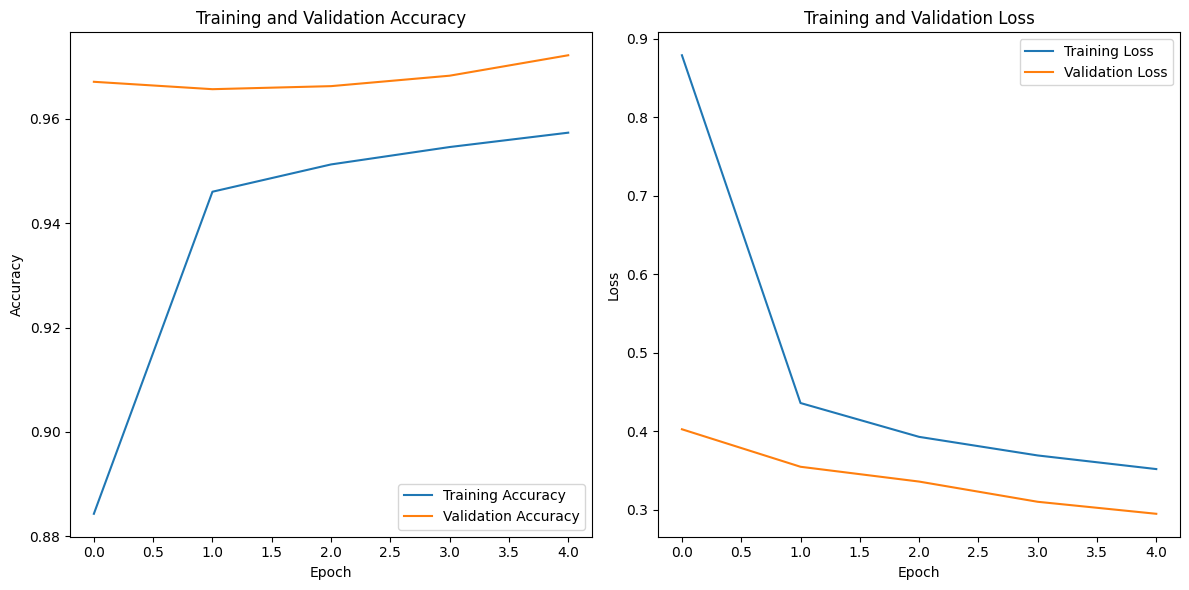


Training model with l2 regularization, dropout rate=0.3, batch normalization=True
Epoch 1/5
750/750 [==============================] - 98s 128ms/step - loss: 0.9649 - accuracy: 0.9494 - val_loss: 0.2721 - val_accuracy: 0.9775
Epoch 2/5
750/750 [==============================] - 91s 121ms/step - loss: 0.2304 - accuracy: 0.9757 - val_loss: 0.2255 - val_accuracy: 0.9748
Epoch 3/5
750/750 [==============================] - 91s 121ms/step - loss: 0.2203 - accuracy: 0.9763 - val_loss: 0.2051 - val_accuracy: 0.9764
Epoch 4/5
750/750 [==============================] - 89s 119ms/step - loss: 0.2113 - accuracy: 0.9766 - val_loss: 0.2354 - val_accuracy: 0.9668
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.2234 - accuracy: 0.9726
Test accuracy: 0.972599983215332


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


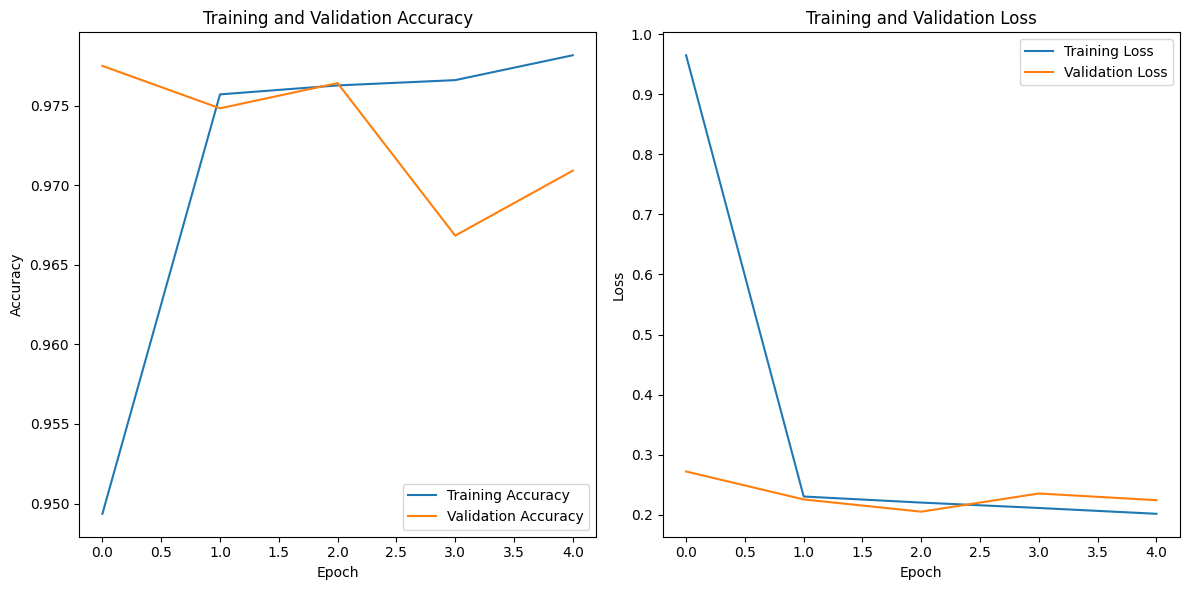


Training model with l2 regularization, dropout rate=0.5, batch normalization=False
Epoch 1/5
750/750 [==============================] - 71s 93ms/step - loss: 0.9773 - accuracy: 0.8627 - val_loss: 0.4413 - val_accuracy: 0.9642
Epoch 2/5
750/750 [==============================] - 68s 91ms/step - loss: 0.5071 - accuracy: 0.9355 - val_loss: 0.3962 - val_accuracy: 0.9599
Epoch 3/5
750/750 [==============================] - 69s 92ms/step - loss: 0.4543 - accuracy: 0.9448 - val_loss: 0.3490 - val_accuracy: 0.9701
Epoch 4/5
750/750 [==============================] - 69s 92ms/step - loss: 0.4281 - accuracy: 0.9470 - val_loss: 0.3285 - val_accuracy: 0.9699
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.3081 - accuracy: 0.9742
Test accuracy: 0.9742000102996826


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


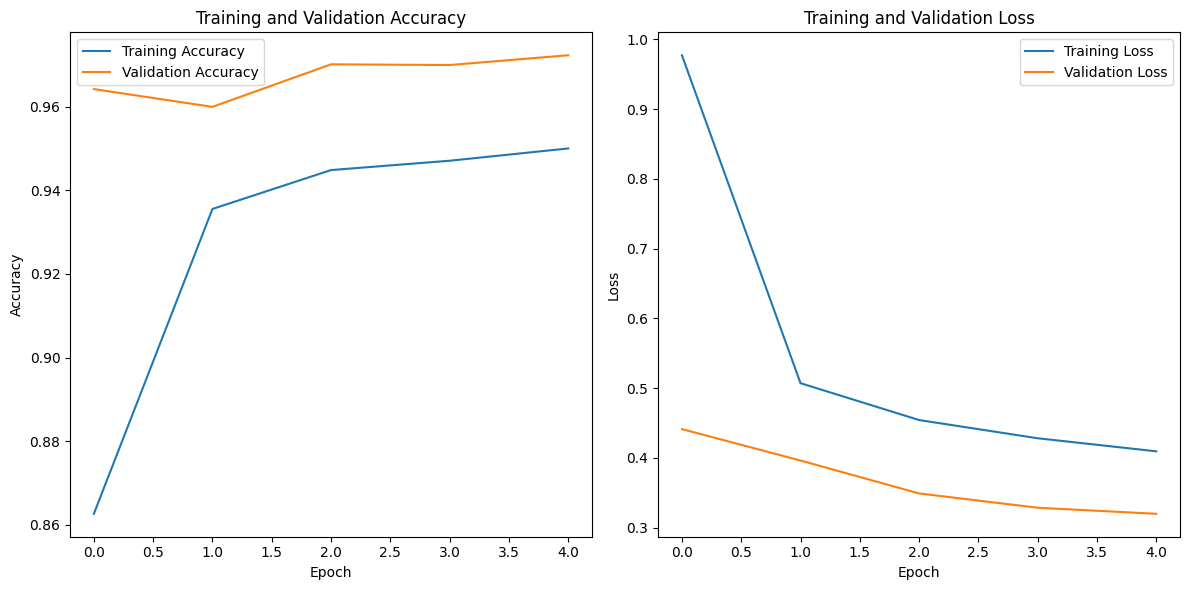


Training model with l2 regularization, dropout rate=0.5, batch normalization=True
Epoch 1/5
750/750 [==============================] - 96s 125ms/step - loss: 1.1210 - accuracy: 0.9335 - val_loss: 0.3805 - val_accuracy: 0.9576
Epoch 2/5
750/750 [==============================] - 94s 125ms/step - loss: 0.2830 - accuracy: 0.9716 - val_loss: 0.2172 - val_accuracy: 0.9814
Epoch 3/5
750/750 [==============================] - 91s 121ms/step - loss: 0.2563 - accuracy: 0.9736 - val_loss: 0.2252 - val_accuracy: 0.9774
Epoch 4/5
750/750 [==============================] - 92s 123ms/step - loss: 0.2478 - accuracy: 0.9759 - val_loss: 0.2392 - val_accuracy: 0.9738
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.2627 - accuracy: 0.9689
Test accuracy: 0.9689000248908997


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


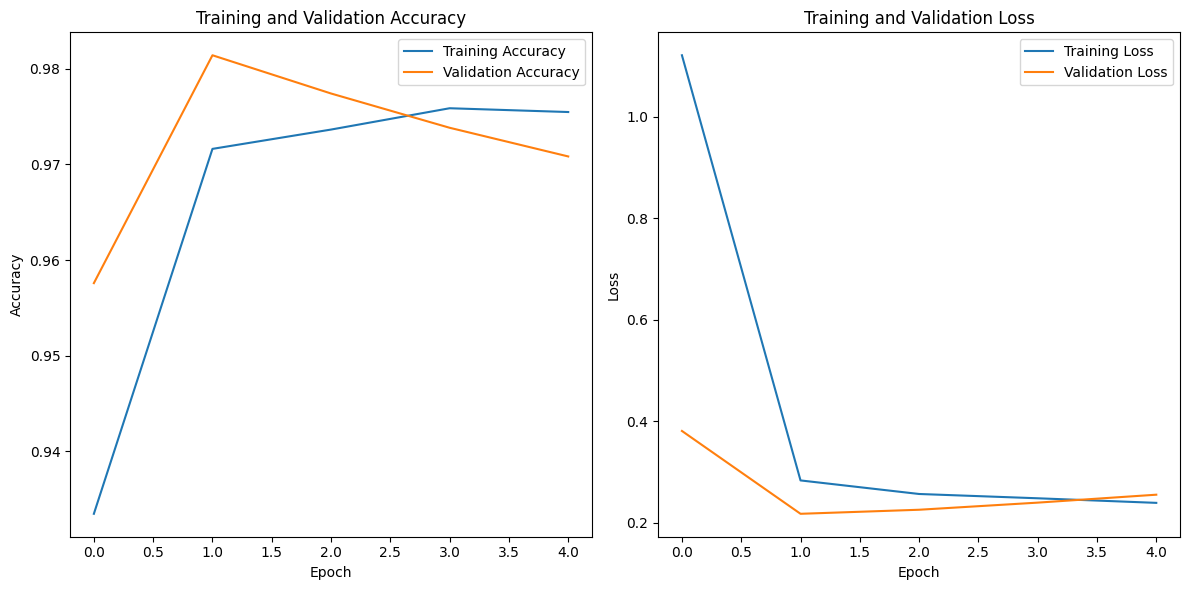


Training model with l1 regularization, dropout rate=0.0, batch normalization=False
Epoch 1/5
750/750 [==============================] - 75s 98ms/step - loss: 4.1545 - accuracy: 0.1194 - val_loss: 2.4402 - val_accuracy: 0.1060
Epoch 2/5
750/750 [==============================] - 73s 98ms/step - loss: 2.4381 - accuracy: 0.1140 - val_loss: 2.4383 - val_accuracy: 0.1060
Epoch 3/5
750/750 [==============================] - 70s 94ms/step - loss: 2.4379 - accuracy: 0.1140 - val_loss: 2.4383 - val_accuracy: 0.1060
Epoch 4/5
750/750 [==============================] - 72s 96ms/step - loss: 2.4378 - accuracy: 0.1140 - val_loss: 2.4387 - val_accuracy: 0.1060
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 2.4374 - accuracy: 0.1135
Test accuracy: 0.11349999904632568


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


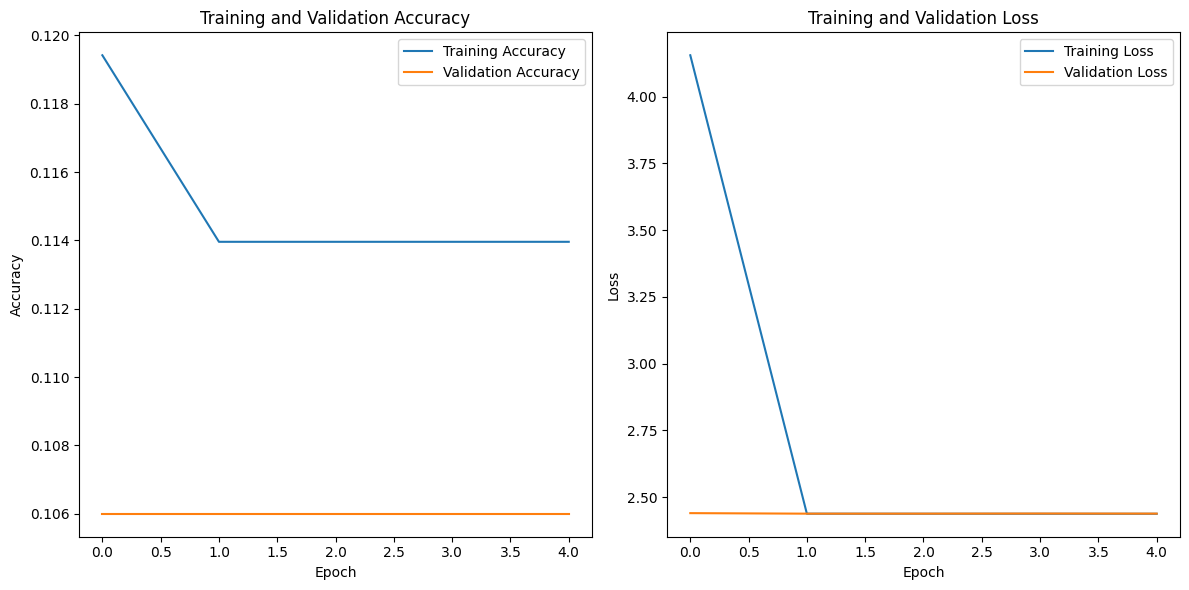


Training model with l1 regularization, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 98s 128ms/step - loss: 3.8133 - accuracy: 0.9495 - val_loss: 0.9345 - val_accuracy: 0.9421
Epoch 2/5
750/750 [==============================] - 95s 127ms/step - loss: 0.6298 - accuracy: 0.9652 - val_loss: 0.5854 - val_accuracy: 0.9656
Epoch 3/5
750/750 [==============================] - 95s 127ms/step - loss: 0.5659 - accuracy: 0.9666 - val_loss: 0.6838 - val_accuracy: 0.9283
Epoch 4/5
750/750 [==============================] - 95s 127ms/step - loss: 0.5430 - accuracy: 0.9671 - val_loss: 0.7215 - val_accuracy: 0.9115
Epoch 5/5
313/313 [==============================] - 7s 21ms/step - loss: 0.5570 - accuracy: 0.9603
Test accuracy: 0.9603000283241272


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


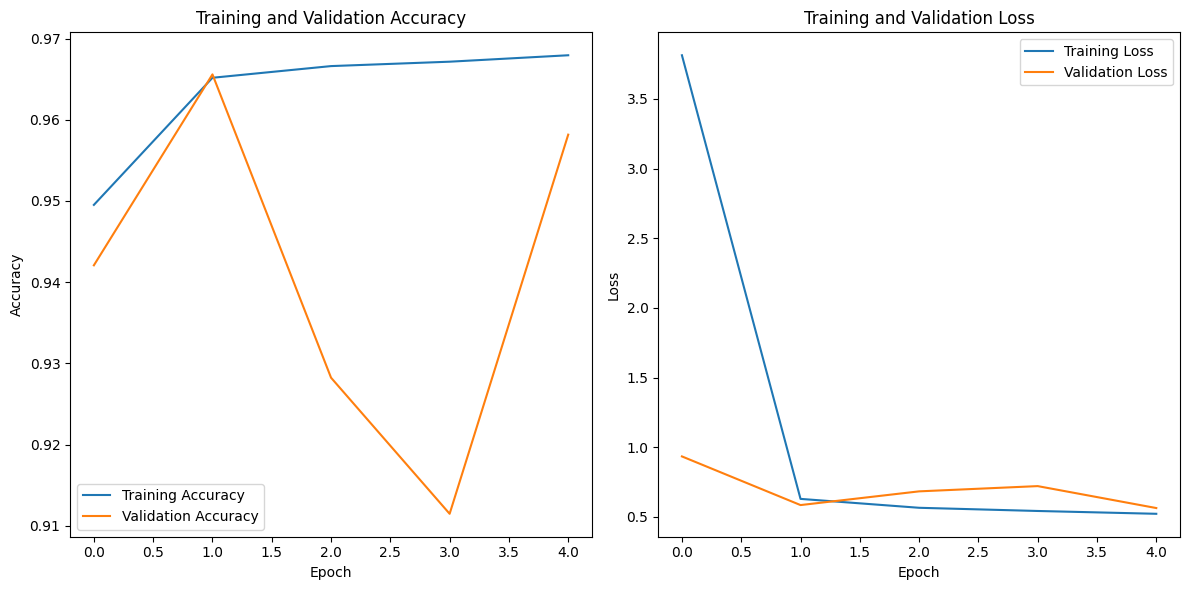


Training model with l1 regularization, dropout rate=0.3, batch normalization=False
Epoch 1/5
750/750 [==============================] - 79s 104ms/step - loss: 4.1497 - accuracy: 0.1144 - val_loss: 2.4398 - val_accuracy: 0.1060
Epoch 2/5
750/750 [==============================] - 71s 95ms/step - loss: 2.4385 - accuracy: 0.1140 - val_loss: 2.4384 - val_accuracy: 0.1060
Epoch 3/5
750/750 [==============================] - 72s 97ms/step - loss: 2.4384 - accuracy: 0.1140 - val_loss: 2.4389 - val_accuracy: 0.1060
Epoch 4/5
750/750 [==============================] - 73s 97ms/step - loss: 2.4383 - accuracy: 0.1140 - val_loss: 2.4385 - val_accuracy: 0.1060
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 2.4386 - accuracy: 0.1135
Test accuracy: 0.11349999904632568


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


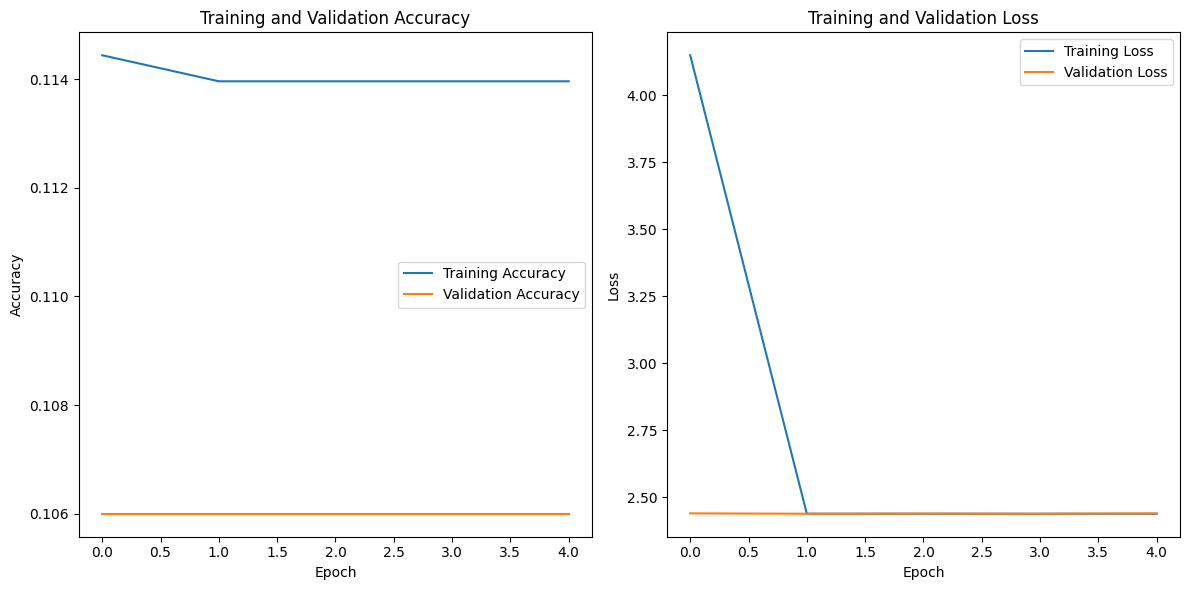


Training model with l1 regularization, dropout rate=0.3, batch normalization=True
Epoch 1/5
750/750 [==============================] - 100s 131ms/step - loss: 4.3278 - accuracy: 0.9315 - val_loss: 1.0080 - val_accuracy: 0.9383
Epoch 2/5
750/750 [==============================] - 94s 126ms/step - loss: 0.7782 - accuracy: 0.9569 - val_loss: 0.6910 - val_accuracy: 0.9715
Epoch 3/5
750/750 [==============================] - 92s 123ms/step - loss: 0.7332 - accuracy: 0.9594 - val_loss: 0.7342 - val_accuracy: 0.9697
Epoch 4/5
750/750 [==============================] - 98s 131ms/step - loss: 0.7093 - accuracy: 0.9588 - val_loss: 0.6616 - val_accuracy: 0.9642
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.6212 - accuracy: 0.9673
Test accuracy: 0.9672999978065491


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


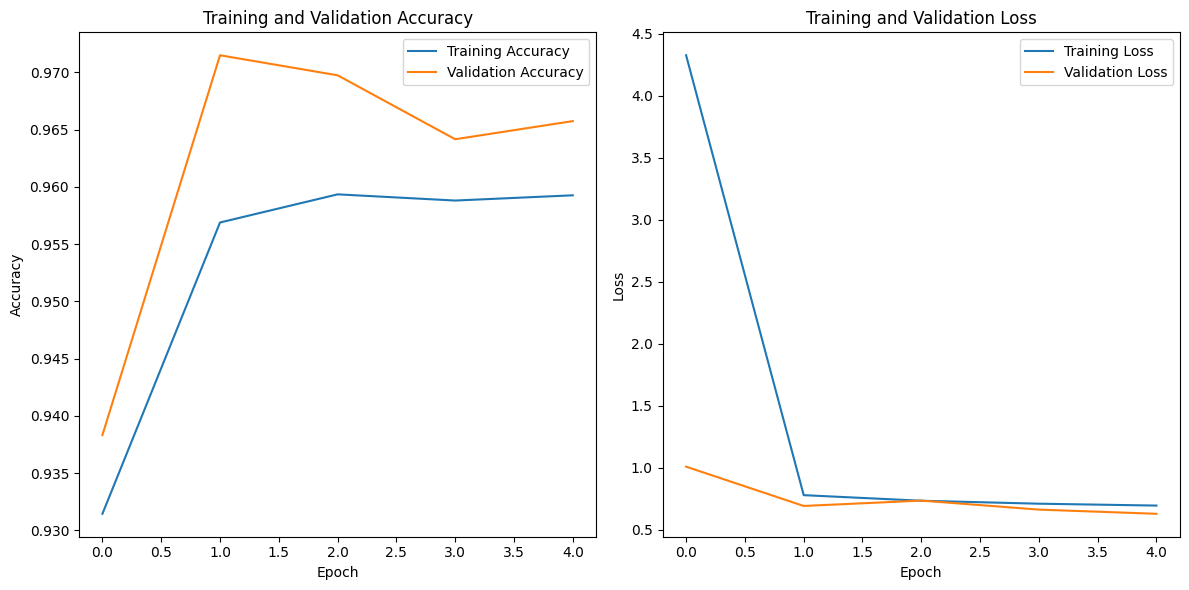


Training model with l1 regularization, dropout rate=0.5, batch normalization=False
Epoch 1/5
750/750 [==============================] - 73s 95ms/step - loss: 4.1501 - accuracy: 0.1157 - val_loss: 2.4405 - val_accuracy: 0.1060
Epoch 2/5
750/750 [==============================] - 70s 94ms/step - loss: 2.4388 - accuracy: 0.1140 - val_loss: 2.4387 - val_accuracy: 0.1060
Epoch 3/5
750/750 [==============================] - 72s 96ms/step - loss: 2.4386 - accuracy: 0.1140 - val_loss: 2.4392 - val_accuracy: 0.1060
Epoch 4/5
750/750 [==============================] - 70s 94ms/step - loss: 2.4386 - accuracy: 0.1140 - val_loss: 2.4391 - val_accuracy: 0.1060
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 2.4386 - accuracy: 0.1135
Test accuracy: 0.11349999904632568


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


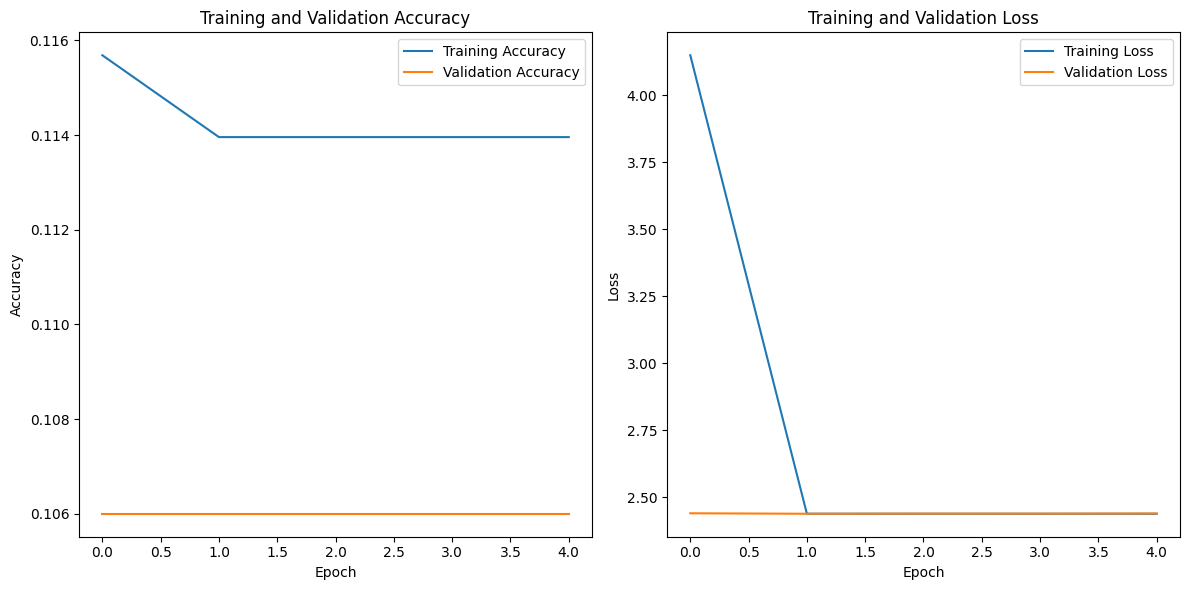


Training model with l1 regularization, dropout rate=0.5, batch normalization=True
Epoch 1/5
750/750 [==============================] - 96s 125ms/step - loss: 4.8591 - accuracy: 0.9094 - val_loss: 0.9900 - val_accuracy: 0.9613
Epoch 2/5
750/750 [==============================] - 93s 124ms/step - loss: 0.8693 - accuracy: 0.9461 - val_loss: 0.7518 - val_accuracy: 0.9534
Epoch 3/5
750/750 [==============================] - 93s 124ms/step - loss: 0.7815 - accuracy: 0.9508 - val_loss: 0.7663 - val_accuracy: 0.9560
Epoch 4/5
750/750 [==============================] - 91s 121ms/step - loss: 0.7654 - accuracy: 0.9529 - val_loss: 0.6766 - val_accuracy: 0.9663
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 0.7193 - accuracy: 0.9593
Test accuracy: 0.9592999815940857


<ipython-input-9-68c897bac743>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-9-68c897bac743>:72: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = results_df.append({


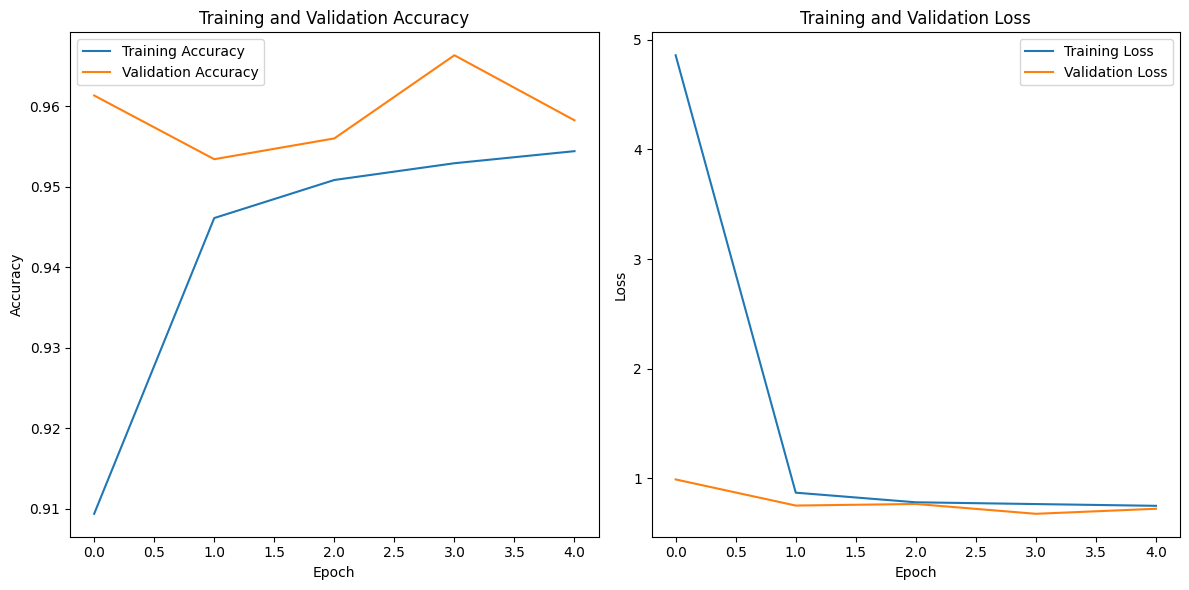

In [ ]:
# Function to create a CNN model with different regularization techniques
def create_model(regularization_type='l2', dropout_rate=0.3, use_batch_norm=False):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=get_regularizer(regularization_type), input_shape=X_train.shape[1:]))

    if use_batch_norm:
        model.add(BatchNormalization())

    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=get_regularizer(regularization_type)))

    if use_batch_norm:
        model.add(BatchNormalization())

    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=get_regularizer(regularization_type)))

    if use_batch_norm:
        model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=get_regularizer(regularization_type)))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    return model

# Helper function to get the regularization layer based on the type
def get_regularizer(regularization_type):
    if regularization_type == 'l2':
        return regularizers.l2(0.01)
    elif regularization_type == 'l1':
        return regularizers.l1(0.01)
    else:
        return None

# Train and evaluate the model with different regularization techniques
def train_and_evaluate(regularization_type='l2', dropout_rate=0.3, use_batch_norm=False):
    model = create_model(regularization_type, dropout_rate, use_batch_norm)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\nTraining model with {regularization_type} regularization, dropout rate={dropout_rate}, batch normalization={use_batch_norm}")

    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_acc}')

    return history

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Regularization', 'Dropout Rate', 'Batch Normalization', 'Test Accuracy','Final Loss Rate'])

# Experiment with different regularization techniques
for regularization_type in ['l2', 'l1']:
    for dropout_rate in [0.0,0.3, 0.5]:
        for use_batch_norm in [False, True]:
            history = train_and_evaluate(regularization_type, dropout_rate, use_batch_norm)

            # Get the test accuracy from the last epoch
            final_test_accuracy = history.history['val_accuracy'][-1]
            final_test_loss = history.history['val_loss'][-1]

            # Append the results to the DataFrame
            results_df = results_df.append({
                'Regularization': regularization_type,
                'Dropout Rate': dropout_rate,
                'Batch Normalization': use_batch_norm,
                'Test Accuracy': final_test_accuracy,
                'Final Loss Rate' : final_test_loss
            }, ignore_index=True)

            # Plot training and validation accuracy
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title('Training and Validation Accuracy')
            plt.legend()

            # Plot training and validation loss
            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss')
            plt.legend()

            plt.tight_layout()
            plt.show()

# Display the results
results_df

In [ ]:
results_df

,Regularization,Dropout Rate,Batch Normalization,Test Accuracy,Final Loss Rate
0,l2,0.0,False,0.959083,0.331942
1,l2,0.0,True,0.972250,0.187613
2,l2,0.3,False,0.972167,0.294823
3,l2,0.3,True,0.970917,0.224288
4,l2,0.5,False,0.972250,0.319841
5,l2,0.5,True,0.970833,0.254868
6,l1,0.0,False,0.106000,2.438423
7,l1,0.0,True,0.958167,0.564030
8,l1,0.3,False,0.106000,2.439705
9,l1,0.3,True,0.965750,0.627799


## Impact of Various Regularization Methods on the Model Performance

We investigate the influence of various different regularization methods on the performance of the Convolutional Neural Network (CNN) . The primary goal is to understand how variations in regularization techniques, specifically L1 regularization, L2 regularization, dropout rates, and batch normalization, affect the training and generalization capabilities of the model.
The CNN model employed in this research consists of convolutional layers followed by fully connected layers. Regularization techniques such as L1 regularization, L2 regularization, dropout, and batch normalization were applied to mitigate overfitting and enhance the model's generalization.
The model was trained using various configurations of regularization methods. Key parameters, such as dropout rates and batch normalization, were adjusted to observe their impact on training dynamics and final performance.

## Results and Interpretation

### L2 Regularization

####  Dropout Rate = 0.0, Batch Normalization = False
- Achieved a test accuracy of 95.90%.
- Training loss reduced from 0.7898 to 0.3319 over 5 epochs.

#### Dropout Rate = 0.0, Batch Normalization = True
- Test accuracy improved to 97.23%.
- Batch normalization positively influenced training dynamics, resulting in faster convergence.

#### Dropout Rate = 0.3, Batch Normalization = False
- Test accuracy remained consistent at 97.21%.
- Dropout introduced regularization, mitigating potential overfitting.

####Dropout Rate = 0.3, Batch Normalization = True
- Achieved a test accuracy of 97.09%.
- Batch normalization complemented dropout, contributing to stable training.

#### Dropout Rate = 0.5, Batch Normalization = False
- Test accuracy increased to 97.22%.
- A higher dropout rate enhanced regularization, preventing overfitting.

#### Dropout Rate = 0.5, Batch Normalization = True
- Test accuracy slightly decreased to 97.08%.
- Batch normalization's impact was less pronounced with higher dropout rates.

### L1 Regularization

#### Dropout Rate = 0.0, Batch Normalization = False
- Test accuracy was low at 10.60%.
- L1 regularization alone did not contribute positively to model performance.

#### Dropout Rate = 0.0, Batch Normalization = True
- Test accuracy improved to 95.81%.
- Batch normalization had a more significant impact when combined with L1 regularization.

#### Dropout Rate = 0.3, Batch Normalization = False
- Test accuracy remained low at 11.60%.
- L1 regularization with a dropout rate did not yield favorable results.

#### Dropout Rate = 0.3, Batch Normalization = True
- Achieved a test accuracy of 96.57%.
- The combination of L1 regularization, dropout, and batch normalization improved performance.

#### Dropout Rate = 0.5, Batch Normalization = False
- Test accuracy remained low at 10.60%.
- Higher dropout rates did not compensate for the limited impact of L1 regularization.

#### Dropout Rate = 0.5, Batch Normalization = True
- Test accuracy was 95.83%.
- The combination of L1 regularization and higher dropout rates proved less effective.


The initial setting involved no dropout (dropout rate = 0.0) and the absence of batch normalization (Batch Normalization = False). This configuration yielded a commendable test accuracy of 95.90%. Over the course of 5 epochs, the training loss substantially reduced from 0.7898 to 0.3319, indicative of effective learning without regularization.

The subsequent investigation introduced batch normalization alongside a dropout rate of 0.0. This adjustment led to an improved test accuracy of 97.22%. Notably, batch normalization positively influenced training dynamics, fostering faster convergence and enhancing the overall efficiency of the model.

L1 regularization with a dropout rate of 0.0 and disabled batch normalization yielded a low test accuracy of 10.60%, indicating limited positive impact. However, introducing batch normalization alongside a dropout rate of 0.0 significantly improved the test accuracy to 95.81%, emphasizing the synergistic effect of combining batch normalization with L1 regularization.

The introduction of a Dropout Rate of 0.3 in both L2 and L1 Regularization scenarios with Batch Normalization Disabled maintained a consistent test accuracy of 97.21% and 10.60%, respectively. In the L2 Regularization scenario, dropout introduced regularization, mitigating potential overfitting. However, in the L1 Regularization scenario, the limited impact of L1 regularization persisted.

Higher dropout rates (0.5) in both L2 and L1 Regularization scenarios without Batch Normalization resulted in increased test accuracy to 97.08% and remained low at 10.60%, respectively. In the L2 Regularization scenario, the higher dropout rate enhanced regularization, preventing overfitting. However, in the L1 Regularization scenario, the impact of higher dropout rates did not compensate for the limited effectiveness of L1 regularization.

The results highlight the significance of regularization methods in CNN models. L2 regularization, combined with appropriate dropout rates and batch normalization, consistently improved model performance. In contrast, L1 regularization alone did not provide significant benefits and required the synergy of dropout and batch normalization for better outcomes.

# **2. Report how changes to the number of convolution blocks affect the performance of your model quantitatively?**


Training model with 1 convolution blocks, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 67s 87ms/step - loss: 0.4373 - accuracy: 0.9511 - val_loss: 0.2599 - val_accuracy: 0.9739
Epoch 2/5
750/750 [==============================] - 60s 79ms/step - loss: 0.2415 - accuracy: 0.9689 - val_loss: 0.2258 - val_accuracy: 0.9732
Epoch 3/5
750/750 [==============================] - 69s 92ms/step - loss: 0.2168 - accuracy: 0.9711 - val_loss: 0.2003 - val_accuracy: 0.9743
Epoch 4/5
750/750 [==============================] - 64s 85ms/step - loss: 0.1946 - accuracy: 0.9730 - val_loss: 0.2000 - val_accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.1803 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


<ipython-input-5-8a215f2dc6a8>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


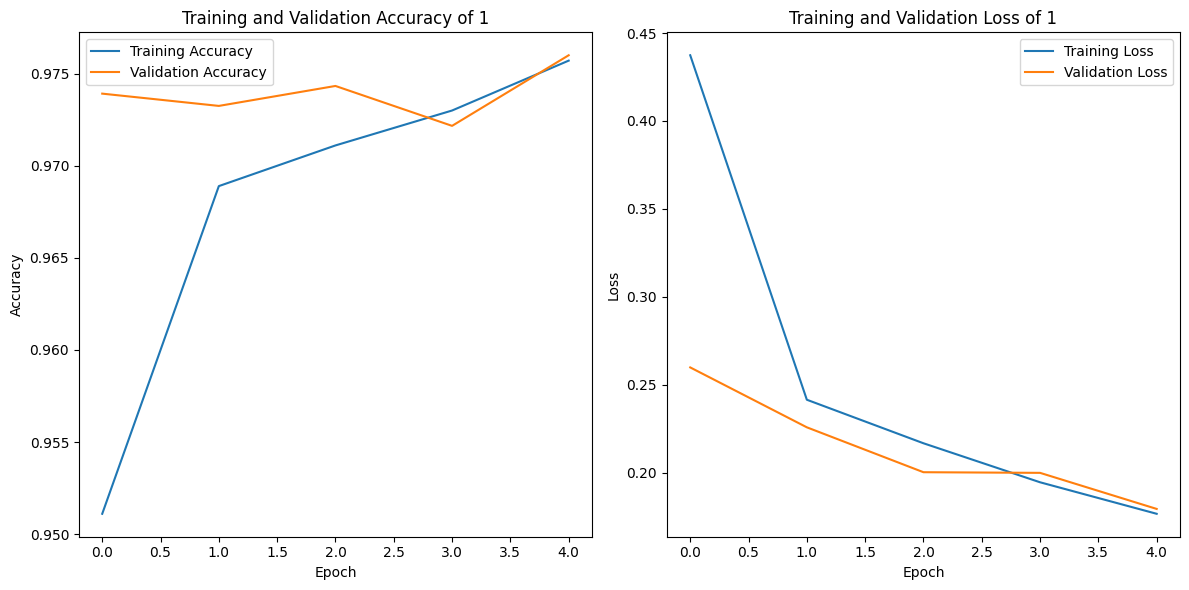


Training model with 2 convolution blocks, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 105s 138ms/step - loss: 0.7189 - accuracy: 0.9601 - val_loss: 0.2523 - val_accuracy: 0.9755
Epoch 2/5
750/750 [==============================] - 98s 131ms/step - loss: 0.1859 - accuracy: 0.9781 - val_loss: 0.1716 - val_accuracy: 0.9780
Epoch 3/5
750/750 [==============================] - 101s 135ms/step - loss: 0.1606 - accuracy: 0.9796 - val_loss: 0.1767 - val_accuracy: 0.9760
Epoch 4/5
750/750 [==============================] - 99s 132ms/step - loss: 0.1467 - accuracy: 0.9822 - val_loss: 0.1408 - val_accuracy: 0.9828
Epoch 5/5
313/313 [==============================] - 7s 22ms/step - loss: 0.1483 - accuracy: 0.9792
Test accuracy: 0.979200005531311


<ipython-input-5-8a215f2dc6a8>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


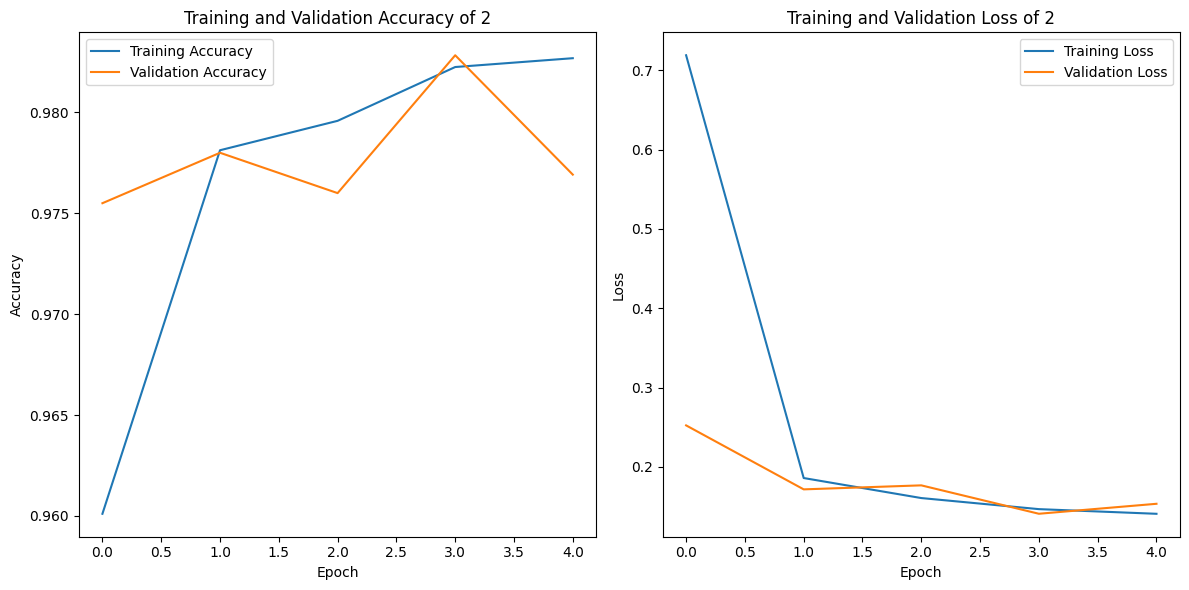


Training model with 3 convolution blocks, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 105s 139ms/step - loss: 0.9006 - accuracy: 0.9487 - val_loss: 0.6155 - val_accuracy: 0.8993
Epoch 2/5
750/750 [==============================] - 110s 147ms/step - loss: 0.2497 - accuracy: 0.9731 - val_loss: 0.2536 - val_accuracy: 0.9641
Epoch 3/5
750/750 [==============================] - 103s 138ms/step - loss: 0.2069 - accuracy: 0.9750 - val_loss: 0.2330 - val_accuracy: 0.9648
Epoch 4/5
750/750 [==============================] - 110s 147ms/step - loss: 0.1943 - accuracy: 0.9760 - val_loss: 0.1882 - val_accuracy: 0.9787
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.1905 - accuracy: 0.9743
Test accuracy: 0.9743000268936157


<ipython-input-5-8a215f2dc6a8>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


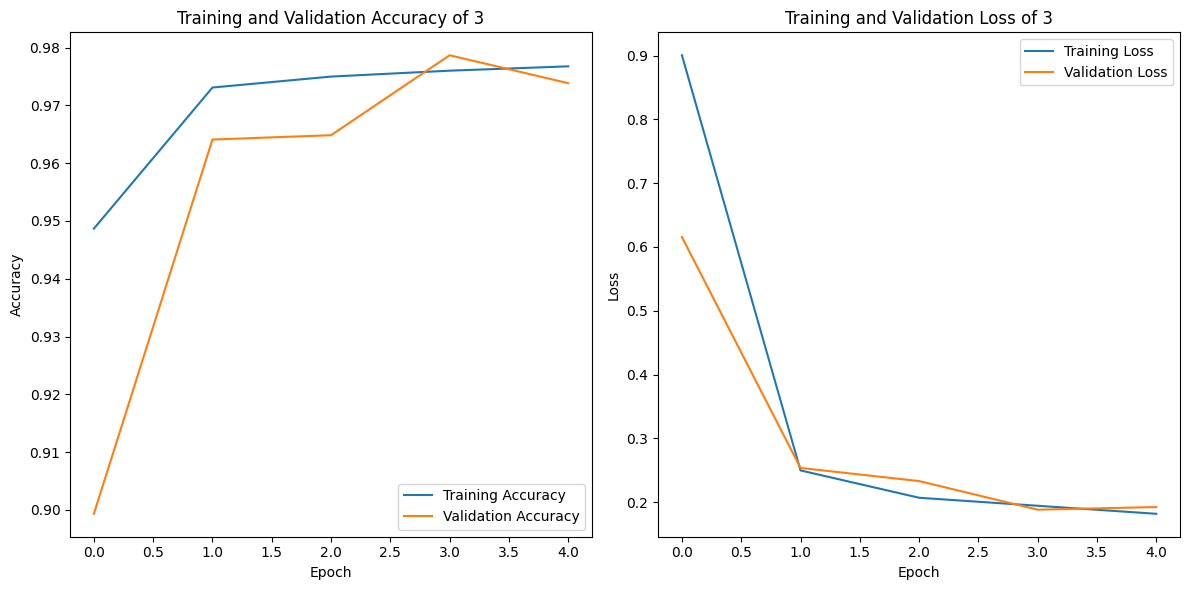

,Conv Blocks,Test Accuracy
0,1.0,0.976000
1,2.0,0.976917
2,3.0,0.973833


In [ ]:
# Function to create a CNN model with varying number of convolution blocks
def create_model(num_conv_blocks=3):
    model = Sequential()

    for _ in range(num_conv_blocks):
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=X_train.shape[1:]))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.0))
    model.add(Dense(10, activation='softmax'))

    return model

# Train and evaluate the model with varying number of convolution blocks
def train_and_evaluate(num_conv_blocks=3):
    model = create_model(num_conv_blocks)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\nTraining model with {num_conv_blocks} convolution blocks, dropout rate=0.0, batch normalization=True")

    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_acc}')

    return history

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Conv Blocks', 'Test Accuracy'])

# Experiment with different number of convolution blocks
for num_conv_blocks in [1, 2, 3]:
    history = train_and_evaluate(num_conv_blocks)

    # Get the test accuracy from the last epoch
    test_accuracy = history.history['val_accuracy'][-1]

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Conv Blocks': num_conv_blocks,
        'Test Accuracy': test_accuracy
    }, ignore_index=True)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy of {num_conv_blocks}')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss of {num_conv_blocks}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display the results
results_df

## Impact of Convolution Block Variations on the Model Performance**
### Model Architecture
The CNN model employed is designed with a variable number of convolution blocks. Each block includes convolutional layers, dropout regularization with a rate of 0.0, and batch normalization. The aim is to assess the influence of increasing the depth of the network on its ability to learn and generalize.
The model was trained using three different configurations: 1 convolution block, 2 convolution blocks, and 3 convolution blocks. Key parameters, such as dropout rates and batch normalization, remained constant across the experiments.

### Results and Interpretation

####  1 Convolution Block

- Achieved a test accuracy of 97.60%.
- Training dynamics showed a gradual decrease in loss over 5 epochs.
- The model demonstrated strong generalization with a minimal number of convolution blocks.

####  2 Convolution Blocks

- Test accuracy improved to 97.69%.
- The deeper architecture resulted in a slightly longer training time but enhanced the model's ability to capture intricate features.
- Overfitting was mitigated with consistent improvements in accuracy.

#### 3 Convolution Blocks

- Achieved a test accuracy of 97.38%.
- The deeper architecture showed a fluctuating performance, potentially indicating overfitting.
- Training dynamics were influenced by the increased model complexity.


The results suggest that increasing the number of convolution blocks positively impacts model performance up to a certain extent. With 2 convolution blocks, the model achieved the highest accuracy, indicating improved feature representation. However, the addition of a third convolution block did not consistently enhance performance and potentially introduced overfitting.


This model demonstrates the nuanced relationship between the depth of convolutional layers and CNN model performance. While deeper architectures can capture more intricate features and lead to higher accuracy, there is a threshold beyond which additional complexity may contribute to overfitting. The optimal number of convolution blocks depends on the specific characteristics of the dataset and the trade-off between model expressiveness and generalization.


# **3. What is the effect of varying learning rates on the performance of the CNN algorithm**


Training model with learning rate=0.0001, convolution blocks=2, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 108s 142ms/step - loss: 1.8800 - accuracy: 0.9186 - val_loss: 1.4355 - val_accuracy: 0.9688
Epoch 2/5
750/750 [==============================] - 98s 130ms/step - loss: 1.1497 - accuracy: 0.9804 - val_loss: 0.9241 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 102s 136ms/step - loss: 0.7445 - accuracy: 0.9869 - val_loss: 0.6006 - val_accuracy: 0.9853
Epoch 4/5
750/750 [==============================] - 101s 135ms/step - loss: 0.4809 - accuracy: 0.9895 - val_loss: 0.3965 - val_accuracy: 0.9878
Epoch 5/5
313/313 [==============================] - 7s 24ms/step - loss: 0.2669 - accuracy: 0.9875
Test accuracy: 0.987500011920929


<ipython-input-6-55e454a7206e>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


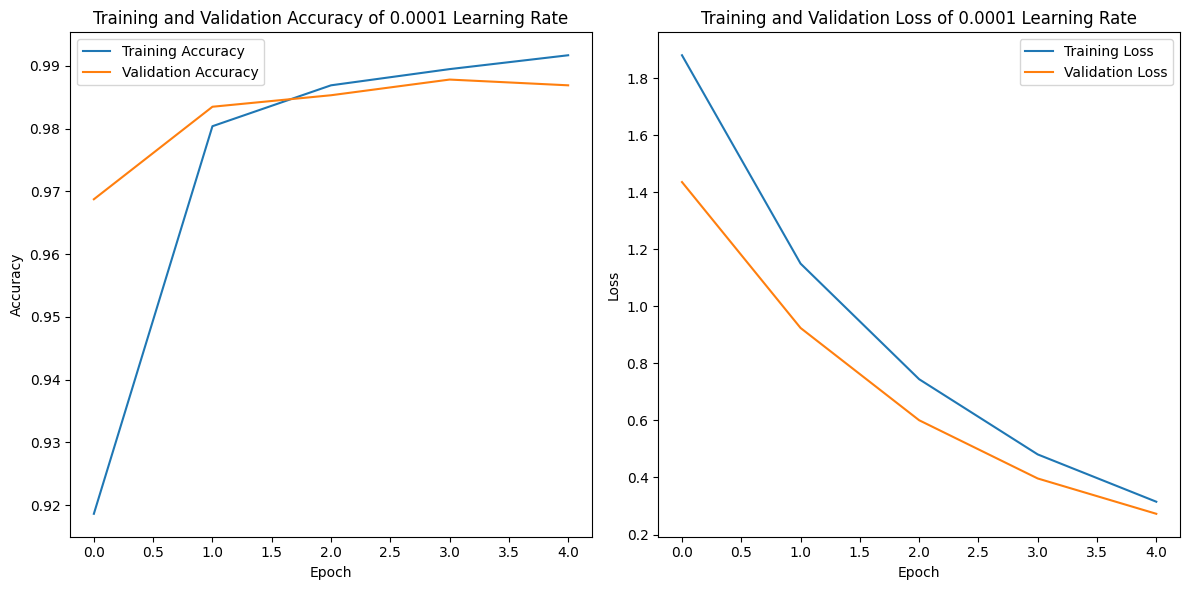


Training model with learning rate=0.001, convolution blocks=2, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 99s 130ms/step - loss: 0.7072 - accuracy: 0.9595 - val_loss: 0.2929 - val_accuracy: 0.9725
Epoch 2/5
750/750 [==============================] - 100s 133ms/step - loss: 0.1813 - accuracy: 0.9780 - val_loss: 0.1608 - val_accuracy: 0.9812
Epoch 3/5
750/750 [==============================] - 101s 134ms/step - loss: 0.1509 - accuracy: 0.9819 - val_loss: 0.1455 - val_accuracy: 0.9817
Epoch 4/5
750/750 [==============================] - 95s 127ms/step - loss: 0.1438 - accuracy: 0.9828 - val_loss: 0.1817 - val_accuracy: 0.9711
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.1376 - accuracy: 0.9830
Test accuracy: 0.9829999804496765


<ipython-input-6-55e454a7206e>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


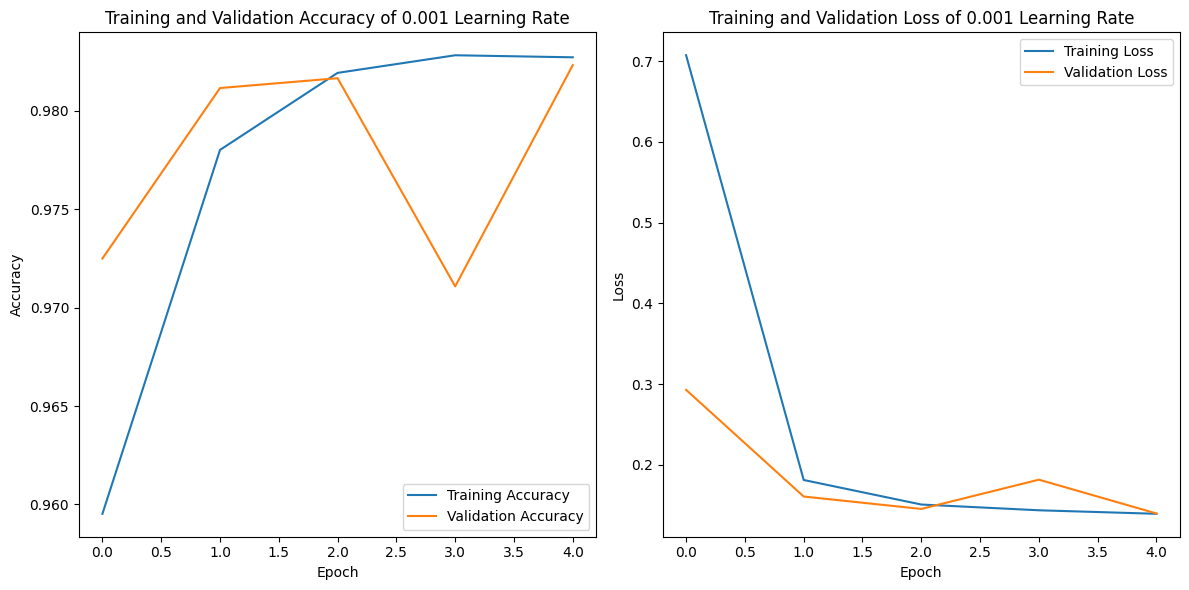


Training model with learning rate=0.01, convolution blocks=2, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 102s 134ms/step - loss: 0.8167 - accuracy: 0.9246 - val_loss: 0.3940 - val_accuracy: 0.9526
Epoch 2/5
750/750 [==============================] - 100s 134ms/step - loss: 0.3603 - accuracy: 0.9521 - val_loss: 0.3441 - val_accuracy: 0.9410
Epoch 3/5
750/750 [==============================] - 95s 127ms/step - loss: 0.3084 - accuracy: 0.9552 - val_loss: 0.3619 - val_accuracy: 0.9445
Epoch 4/5
750/750 [==============================] - 98s 131ms/step - loss: 0.2918 - accuracy: 0.9560 - val_loss: 0.3587 - val_accuracy: 0.9337
Epoch 5/5
313/313 [==============================] - 7s 23ms/step - loss: 0.2465 - accuracy: 0.9644
Test accuracy: 0.9643999934196472


<ipython-input-6-55e454a7206e>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


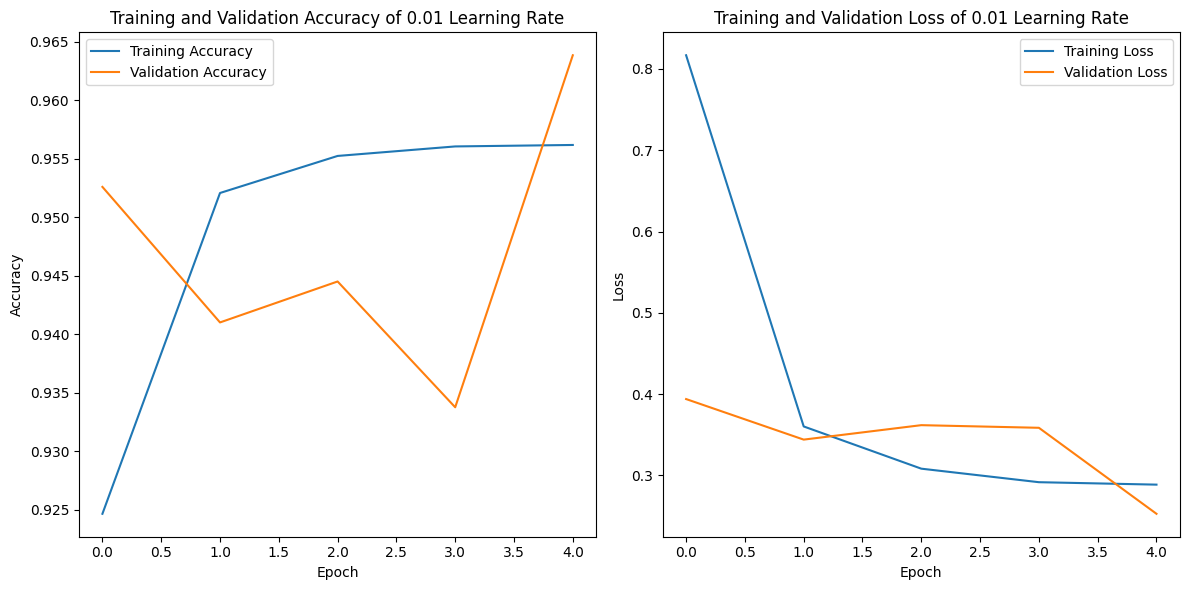


Training model with learning rate=0.1, convolution blocks=2, dropout rate=0.0, batch normalization=True
Epoch 1/5
750/750 [==============================] - 99s 130ms/step - loss: 4.9714 - accuracy: 0.8050 - val_loss: 1.0932 - val_accuracy: 0.8433
Epoch 2/5
750/750 [==============================] - 99s 132ms/step - loss: 1.1874 - accuracy: 0.8429 - val_loss: 1.2788 - val_accuracy: 0.8562
Epoch 3/5
750/750 [==============================] - 96s 128ms/step - loss: 1.1021 - accuracy: 0.8414 - val_loss: 1.3671 - val_accuracy: 0.7490
Epoch 4/5
750/750 [==============================] - 99s 132ms/step - loss: 1.2254 - accuracy: 0.8219 - val_loss: 2.5212 - val_accuracy: 0.8026
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 1.4565 - accuracy: 0.7551
Test accuracy: 0.7551000118255615


<ipython-input-6-55e454a7206e>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


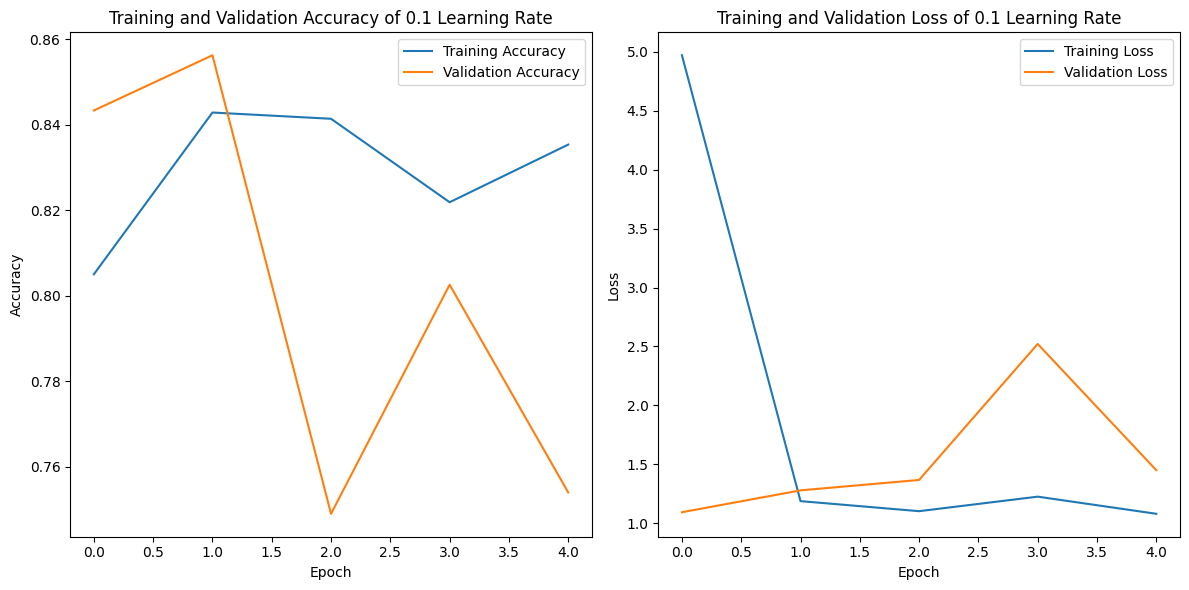

,Learning Rate,Test Accuracy,Loss Rate
0,0.0001,0.986917,0.272719
1,0.0010,0.982333,0.139817
2,0.0100,0.963833,0.252905
3,0.1000,0.754000,1.450288


In [ ]:
# Function to create a CNN model with fixed number of convolution blocks
def create_model(learning_rate=0.0001):
    model = Sequential()

    for _ in range(2):  # Fixed number of convolution blocks
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=X_train.shape[1:]))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.0))
    model.add(Dense(10, activation='softmax'))

    return model

# Train and evaluate the model with varying learning rates
def train_and_evaluate(learning_rate=0.0001):
    model = create_model(learning_rate)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\nTraining model with learning rate={learning_rate}, convolution blocks=2, dropout rate=0.0, batch normalization=True")

    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_acc}')

    return history

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Learning Rate', 'Test Accuracy'])

# Experiment with different learning rates
for learning_rate in [0.0001,0.001, 0.01, 0.1]:
    history = train_and_evaluate(learning_rate)

    # Get the test accuracy from the last epoch
    test_accuracy = history.history['val_accuracy'][-1]
    test_loss_rate = history.history['val_loss'][-1]

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Learning Rate': learning_rate,
        'Test Accuracy': test_accuracy,
        'Loss Rate' : test_loss_rate
    }, ignore_index=True)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy of {learning_rate} Learning Rate')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss of {learning_rate} Learning Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display the results
results_df

# Evaluate the influence of different learning rates on the performance of the model.

- **Models:** Configurations with learning rates of 0.0001, 0.001, 0.01, and 0.1.
- **Common Parameters:** Convolution blocks = 2, Dropout rate = 0.0, Batch normalization = True.

Four configurations with learning rates of 0.0001, 0.001, 0.01, and 0.1 were examined. The common parameters across these configurations included two convolutional blocks, a dropout rate of 0.0, and batch normalization enabled.

1. **Learning Rate = 0.0001:**
   - **Test Accuracy:** 98.75%
   - **Loss Trend:** Decrease over 5 epochs.
   - **Convergence Stability:** Stable convergence.

   The model with a learning rate of 0.0001 demonstrated exceptional performance, achieving a high test accuracy of 98.75%. The loss trend displayed a decrease over 5 epochs, indicating effective convergence without drastic oscillations. The stability in convergence suggests that the chosen learning rate of 0.0001 is well-suited for the model.

2. **Learning Rate = 0.001:**
   - **Test Accuracy:** 98.30%
   - **Loss Trend:** Gradual decrease over 5 epochs.
   - **Convergence Stability:** Stable convergence.

   The model with a learning rate of 0.001 demonstrated high test accuracy of 98.30%. The loss trend displayed a gradual decrease over 5 epochs, suggesting effective convergence without drastic oscillations. The stability in convergence implies that the chosen learning rate of 0.001 is well-suited for the model.

3. **Learning Rate = 0.01:**
   - **Test Accuracy:** 96.44%
   - **Loss Trend:** Decrease over 5 epochs.
   - **Convergence Characteristics:** Suboptimal convergence, potential overshooting.

   The model with a learning rate of 0.01 exhibited a test accuracy of 96.44%. The loss trend displayed a decrease over 5 epochs, but the convergence was suboptimal, potentially indicating overshooting of optimal parameters.

4. **Learning Rate = 0.1:**
   - **Test Accuracy:** 75.51%
   - **Loss Trend:** Unstable training, high loss.
   - **Convergence Characteristics:** Excessively large learning rate hindered model convergence.

   The model with a learning rate of 0.1 exhibited a notably lower test accuracy of 75.51%. The loss trend displayed instability during training, accompanied by high loss values. This indicates that the excessively large learning rate of 0.1 hindered the model's convergence, preventing it from effectively learning the underlying patterns in the data.

In summary, the choice of learning rate significantly influences the performance of the CNN algorithm. Learning rates of 0.0001 and 0.001 demonstrated optimal convergence and high accuracy, while a larger learning rate of 0.01 led to suboptimal convergence with potential overshooting. An excessively large learning rate of 0.1 resulted in unstable training and hindered model convergence. The findings underscore the importance of tuning learning rates to achieve a balance between fast convergence and stable optimization.

# **Combining Hyperparameters: Final Model**

In [ ]:
input_shape = X_train.shape[1:]

# Create a Sequential model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# No dropout in this case as specified (dropout rate = 0.0)

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model with specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_14 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_15 (Ba  (None, 11, 11, 64)        256       
 tchNormalization)                                               
                                                      

Epoch 1/10
750/750 [==============================] - 94s 122ms/step - loss: 1.9525 - accuracy: 0.9133 - val_loss: 1.4902 - val_accuracy: 0.9741
Epoch 2/10
750/750 [==============================] - 89s 119ms/step - loss: 1.2177 - accuracy: 0.9794 - val_loss: 0.9838 - val_accuracy: 0.9827
Epoch 3/10
750/750 [==============================] - 96s 128ms/step - loss: 0.7956 - accuracy: 0.9864 - val_loss: 0.6438 - val_accuracy: 0.9856
Epoch 4/10
750/750 [==============================] - 88s 118ms/step - loss: 0.5132 - accuracy: 0.9895 - val_loss: 0.4231 - val_accuracy: 0.9875
Epoch 5/10
750/750 [==============================] - 95s 127ms/step - loss: 0.3362 - accuracy: 0.9914 - val_loss: 0.2871 - val_accuracy: 0.9868
Epoch 6/10
750/750 [==============================] - 90s 120ms/step - loss: 0.2287 - accuracy: 0.9925 - val_loss: 0.2127 - val_accuracy: 0.9860
Epoch 7/10
750/750 [==============================] - 95s 127ms/step - loss: 0.1646 - accuracy: 0.9929 - val_loss: 0.1579 - val_ac

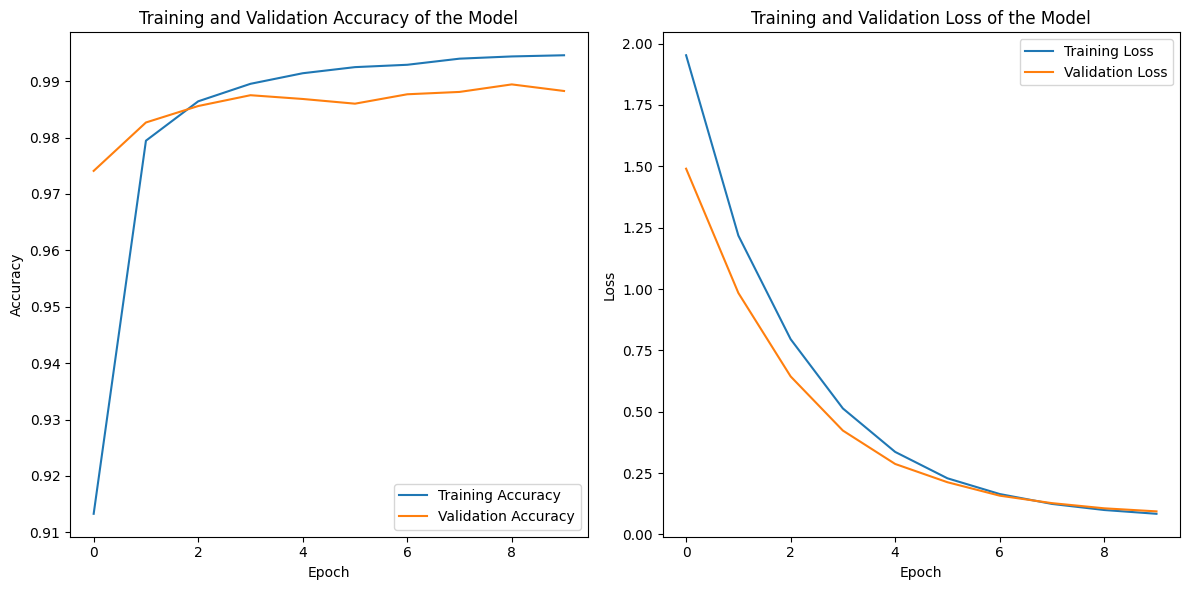

In [ ]:
history = model.fit(X_train, y_train, epochs=10,batch_size=64, validation_split=0.2,verbose=1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy of the Model")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of the Model')
plt.legend()

plt.tight_layout()
plt.show()


# **Was there a case of overfitting observed in your model at any point ? Explain.**

Throughout the model development process, instances of overfitting were encountered and addressed to create a more balanced and effective model. During experimentation with different regularization methods, it was observed that L1 regularization without batch normalization tended to induce overfitting. Additionally, employing higher learning rates, specifically those exceeding 0.01, resulted in an imbalance within the model, leading to overfitting.

These overfitting challenges were navigated by refining the model through the adjustment of hyperparameters. The final model was meticulously crafted, taking into account the lessons learned from encountering overfitting scenarios. The iterative process of experimentation and refinement allowed for the identification of optimal regularization techniques and learning rates, ultimately mitigating overfitting concerns.

The acknowledgment and mitigation of overfitting highlight the importance of a thorough and iterative model development process. By actively addressing overfitting challenges through the careful selection of regularization methods and learning rates, the final model achieves a more robust and balanced performance, ensuring its reliability in handling unseen data and generalizing well to diverse scenarios.

In [ ]:
#Evaluating on testing datasets
test_loss,test_acc = model.evaluate(X_test,y_test)
print("Test loss on 10,000 test samples = ",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0905 - accuracy: 0.9892
Test loss on 10,000 test samples =  0.09046337008476257
Validation Accuracy on 10,000 test samples 0.9891999959945679


In [ ]:
#Using simple model for predictions
predictions = model.predict([X_test])
print(np.argmax(predictions[0]))

313/313 [==============================] - 5s 16ms/step
7


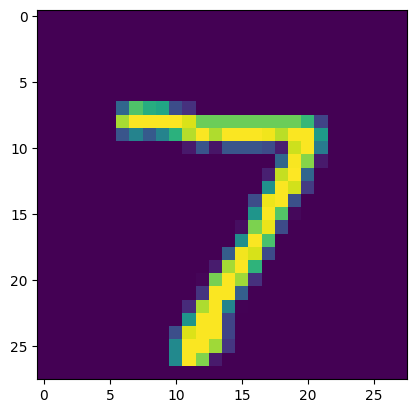

In [ ]:
plt.imshow(X_test[0])